In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data 
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")


In [4]:
###as 'Sunrisers Hyderabad' was earlier named as 'Deccan Chargers' now to make 
###comparisons lets update both dataframes 

deliveries = deliveries.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches = matches.replace('Deccan Chargers', 'Sunrisers Hyderabad')

# Q1) Who will win the match KXIP vs DC?

In [5]:
# get all matches between KXIP vs srh
srh_kxip = matches[((matches.team1=='Sunrisers Hyderabad')&(matches.team2=='Kings XI Punjab'))|((matches.team2=='Sunrisers Hyderabad')&(matches.team1=='Kings XI Punjab'))]

print(f"Total number of matches between KXIP vs srh : {srh_kxip.shape[0]}")

Total number of matches between KXIP vs srh : 24


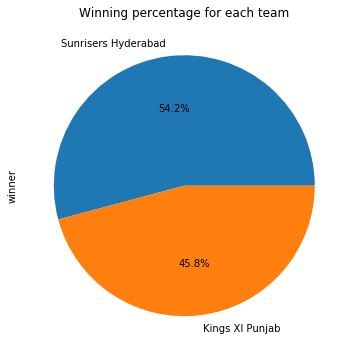

In [7]:
# calculating total wins by each team
srh_kxip.winner.value_counts().plot("pie", autopct = "%1.1f%%", figsize=(20,6))
plt.title("Winning percentage for each team")
plt.show()

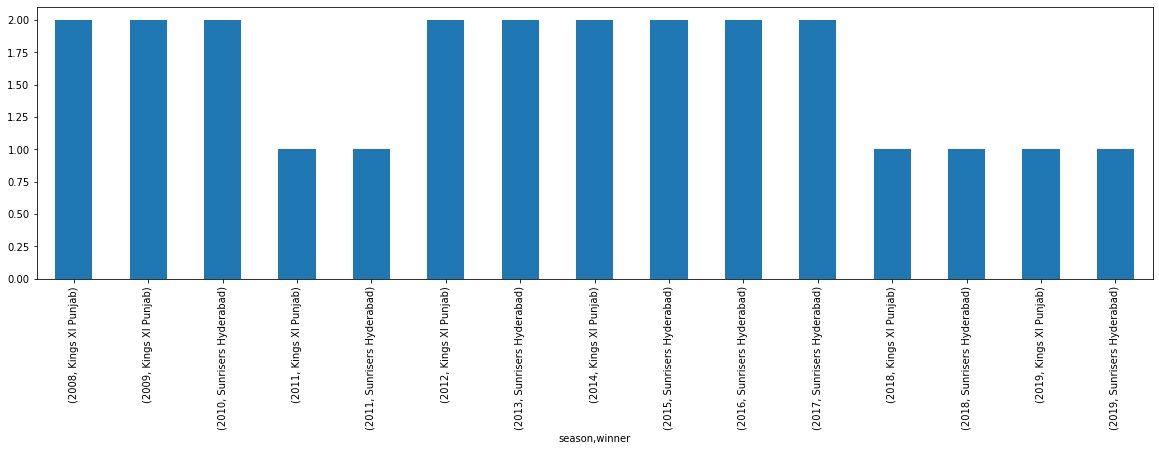

In [8]:
#checking winning percent per season
df_srh_kxip = pd.DataFrame(srh_kxip.groupby('season')['winner'].value_counts())
df_srh_kxip['winner'].plot(kind='bar', figsize=(20,5))

**Inference:**
    SRH and KXIP both are playing almost similar in in season 2020 also overall they have had equzl

# Q2) What will KL Rahul's strike rate be in the first 6 overs?

In [8]:
#get all rows when KL Rahul is batting against DC (overs - 1:6)
klb_dcf_o16 = deliveries[(deliveries.batsman=='KL Rahul')&(deliveries.bowling_team=='Delhi Capitals')&(deliveries.over.isin([1,7]))]

#gett
klb_dcf_o16[['match_id', 'over', 'ball', 'batsman_runs' ]]

#gettin total balls played
klb_dcf_o16_balls = klb_dcf_o16.groupby('match_id')['ball'].count().reset_index()

#getting total runse scored per match
klb_dcf_o16_scores = klb_dcf_o16.groupby('match_id')['batsman_runs'].sum().reset_index()

klb_dcf_o16_sr = klb_dcf_o16_balls.merge(klb_dcf_o16_scores, on='match_id')

klb_dcf_o16_sr['strike_rate'] = np.round((klb_dcf_o16_sr['batsman_runs']/klb_dcf_o16_sr['ball'])*100,2)
                                         
klb_dcf_o16_sr

,match_id,ball,batsman_runs,strike_rate
0,401,5,1,20.00
1,531,2,1,50.00
2,632,3,3,100.00
3,7895,6,16,266.67
4,7915,3,2,66.67
5,11149,6,5,83.33
6,11328,5,2,40.00


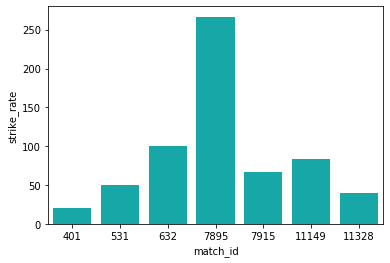

In [9]:
sns.barplot(x='match_id', y='strike_rate', data=klb_dcf_o16_sr, color='c')

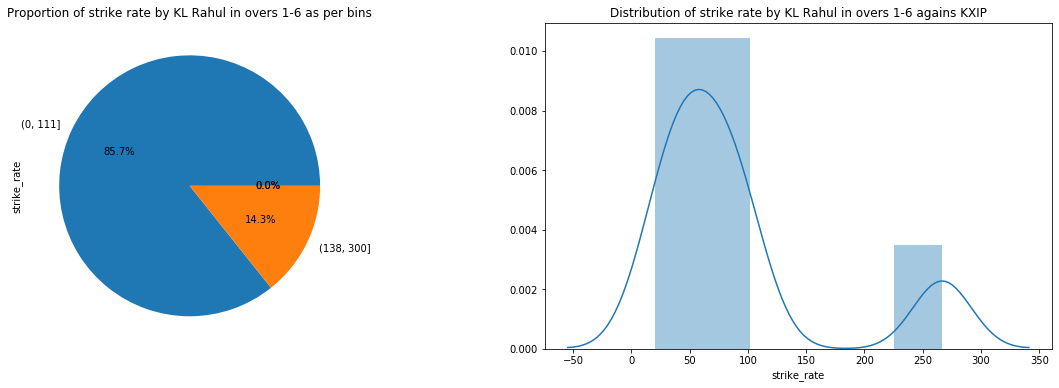

In [10]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].set_title("Proportion of strike rate by KL Rahul in overs 1-6 as per bins")
pd.cut(klb_dcf_o16_sr['strike_rate'], bins=[0,111, 122, 138, 300]).value_counts().plot("pie", autopct='%1.1f%%', ax=ax[0])

ax[1].set_title("Distribution of strike rate by KL Rahul in overs 1-6 agains KXIP")
sns.distplot(klb_dcf_o16_sr['strike_rate'], ax=ax[1])
plt.show()

**Inference:**
    We can see for most of the matches KL Rahuls strike rate has been 0-111 which is 85.7% of time. which is pretty dominant so we can say that KL Rahuls is going to have a strike rate of 0-111.

# Q3) What will be Shreyas Iyer's contribution to DC's total score?

In [11]:
# getting all matches for dc vs kxip
dcb_kxipf = deliveries[(deliveries.batting_team=='Delhi Capitals')&(deliveries.bowling_team=='Kings XI Punjab')]

# getting total score of dc team match wise vs kxip
dcb_kxipf_tot = dcb_kxipf.groupby('match_id')['total_runs'].sum().reset_index()

#getting all rows when Shreya Iyer was batting against KXIP 
sib_kxipf = dcb_kxipf[dcb_kxipf.batsman == 'SS Iyer']

#total runs scored by SS Iyer when agains KXIP match wise
sib_kxipf_tot = sib_kxipf.groupby('match_id')['batsman_runs'].sum().reset_index()
sib_kxipf_tot = sib_kxipf_tot.rename(columns={'batsman_runs':'si_total_runs'}) # changing column name to avoid confusion

#joining the two data frames will be easier for comparison
dcb_kxip_si_tot = dcb_kxipf_tot.merge(sib_kxipf_tot, how='left', on='match_id')

#as its a left join we might get few null values introduced lets replace them with 0 for easier calculations
dcb_kxip_si_tot = dcb_kxip_si_tot.fillna(0)

#getting shreyas iyers contribution in total runs scored by team DC against KXIP
dcb_kxip_si_tot['si_contribution'] = np.round(dcb_kxip_si_tot.si_total_runs / dcb_kxip_si_tot.total_runs, 5)*100

print("Shreyas Iyer contribution in total runs scored by team DC agains KXIP")
dcb_kxip_si_tot

Shreyas Iyer contribution in total runs scored by team DC agains KXIP


,match_id,total_runs,si_total_runs,si_contribution
0,15,188,22.0,11.702
1,35,67,6.0,8.955
2,73,158,0.0,0.000
3,100,118,0.0,0.000
4,120,58,0.0,0.000
5,161,120,0.0,0.000
6,177,146,0.0,0.000
7,218,111,0.0,0.000
8,259,231,0.0,0.000
9,293,141,0.0,0.000


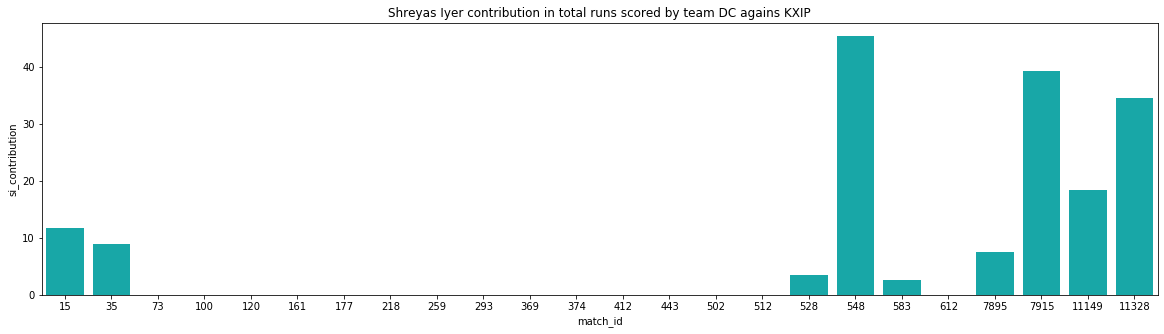

In [12]:
#checking visually
plt.figure(figsize=(20,5))
plt.title("Shreyas Iyer contribution in total runs scored by team DC agains KXIP")
sns.barplot(x='match_id', y='si_contribution', data=dcb_kxip_si_tot, color='c' )

plt.show()

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


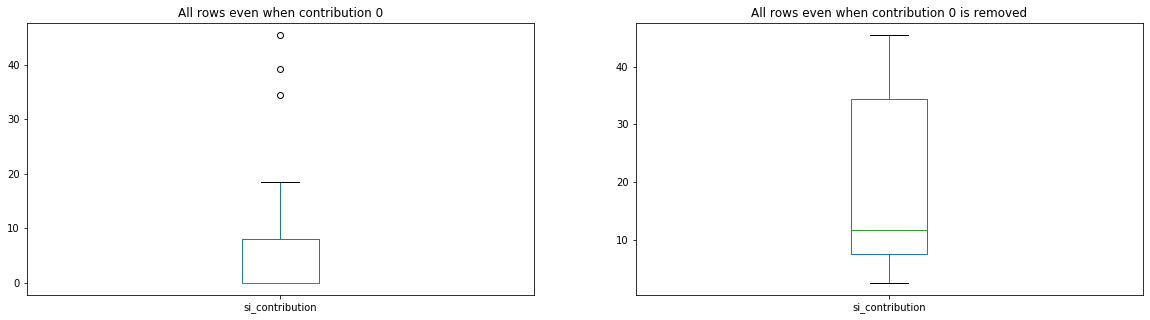

In [13]:
fig, ax=plt.subplots(1,2, figsize=(20,5))
#checking contribution stats
print(dcb_kxip_si_tot['si_contribution'].plot('box', ax=ax[0])) # most of the matches has 0 runs so its understood why mean is lesser
ax[0].set_title("All rows even when contribution 0")

#if we remove rows when his contribution was 0
print(dcb_kxip_si_tot[dcb_kxip_si_tot.si_contribution!=0]['si_contribution'].plot('box', ax=ax[1]))
ax[1].set_title("All rows even when contribution 0 is removed")
plt.show()

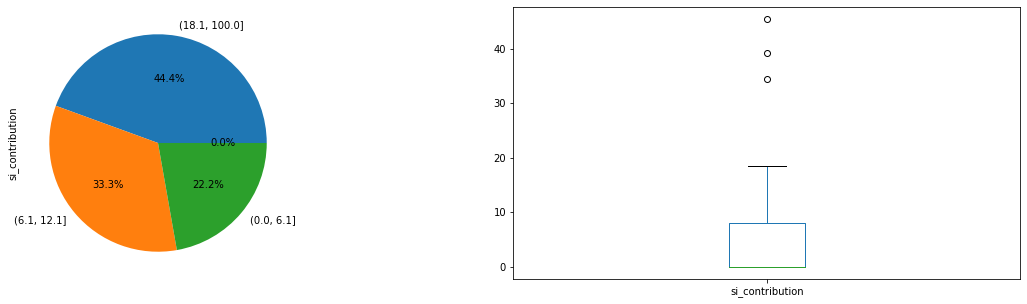

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
pd.cut(dcb_kxip_si_tot['si_contribution'], bins=[0,6.1,12.1, 18.1, 100]).value_counts().plot('pie', autopct='%1.1f%%', ax=ax[0])

dcb_kxip_si_tot['si_contribution'].plot("box", ax=ax[1])

**Inference:**
    Data suggests that shreyas iyer has contributed to more than 18% of runs for the team 44.4% of times but sometimes he has also performed bit lesser which is 33.3%. But in most oif the recent matches his scores has been pretty decent. 

# Q4) How many wickets will be taken by KXIP bowlers excluding that taken by Mohammed Shami, from the 31sr ball to 120th ball?

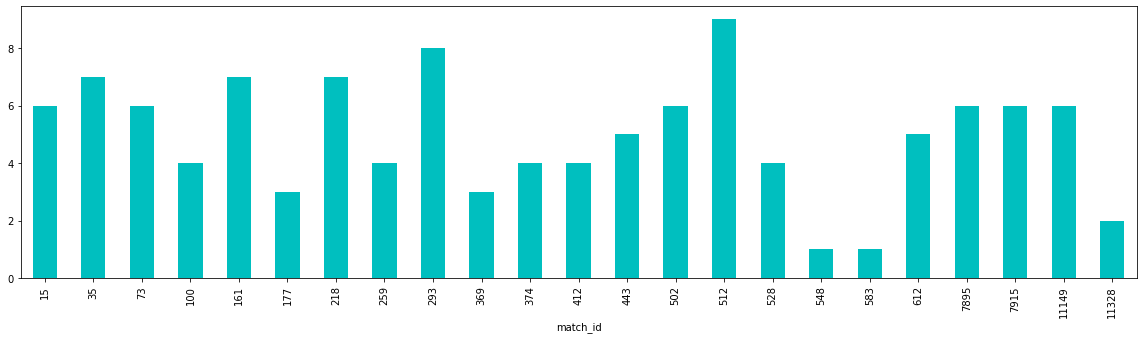

In [15]:
#get all rows when dc bats, KXIP fields (only wickets)
dcb_kxipf_wickets = deliveries[(deliveries.bowling_team=='Kings XI Punjab')&(deliveries.batting_team=='Delhi Capitals')&(deliveries.player_dismissed.notnull())]

#get only rows when KXIP took wickets
# dcb_kxipf_o620[dcb_kxipf_o620.player_dismissed.notnull()]
#get only wickets when dc bats, KXIP fields (overs 6- 20) : (ball 31st - 120th)
dcb_kxipf_wickets_o620 =  dcb_kxipf_wickets[dcb_kxipf_wickets.over.isin(range(6,21))]

#aslo given we dont want overs taken by 'Mohammed Shami' so lets remove those rows
dcb_kxipf_wickets_o620_nms = dcb_kxipf_wickets_o620[dcb_kxipf_wickets_o620.bowler!='Mohammed Shami']

dcb_kxipf_wickets_o620_nms.groupby('match_id')['player_dismissed'].count().plot(kind='bar', figsize=(20,5), color='c')

In [43]:
kxipb_dcf_o621_noshami = deliveries[(deliveries.bowler=='Mohammed Shami')&(deliveries.batting_team=='Kings XI Punjab')&(deliveries.player_dismissed.notnull())]
kxipb_dcf_o621_noshami.groupby('match_id')['batsman'].count()

match_id
502    1
512    1
612    1
Name: batsman, dtype: int64

**Inference:**
    We can see that KXIP bowlers have taken almost 1 wicket without shami's wicket included however 2020 season KXIP is fighting really hard and shami has done exceptionally well in the previous match so we can say that team might take 2-3 runs apart from shami's

# Q5) What will be the status of Chris Gayle's batting during KXIP's innings?

In [34]:
#get all rows when chris gayles batting for Kings XI Punjab

cg_bats = deliveries[(deliveries.batsman=='CH Gayle')&(deliveries.batting_team=='Kings XI Punjab')]

#get all rows when cg plays agains DC
cgb_dcf = cg_bats[cg_bats.bowling_team == 'Delhi Capitals']

#getting how many wickets cg lost
cgb_dcf[cgb_dcf.player_dismissed.notnull()]

#all matches played chris gayle batting
cgb_dcf.dismissal_kind.value_counts()

caught    1
Name: dismissal_kind, dtype: int64

In [37]:
#check strike rate for gayle


#gettin total balls played
cgb_dcf_balls = cgb_dcf.groupby('match_id')['ball'].count().reset_index()

#getting total runse scored per match
cgb_dcf_scores = cgb_dcf.groupby('match_id')['batsman_runs'].sum().reset_index()

cgb_dcf_sr = cgb_dcf_balls.merge(cgb_dcf_scores, on='match_id')

cgb_dcf_sr['strike_rate'] = np.round((cgb_dcf_sr ['batsman_runs']/cgb_dcf_sr ['ball'])*100,2)
                                         
cgb_dcf_sr 

,match_id,ball,batsman_runs,strike_rate
0,11328,37,69,186.49


**Inference:**
    We can see from data that chris gayle has not played a lot of matches againse DC as per data but Chris Gayle is a great player and has a higher strike rate as well. But Delhi is roaring this year so they might not let him score too many runs but he will be out probably.